# Data Provenance 

1. Where is the data from?
    - The data is from World Soil Informance product called SoilGrids (https://www.isric.org/explore/soilgrids)

2. Is it reliable? (partially subjective)
    - Yes, found the resource from a SDM paper
    
# Time measures

1. Time range of the dataset
    - The dataset has only spatial aspect but since the new version was released in 2017 we can assume the data is up-to-date
    
2. Granularity (Weekly, Monthly, Aperiodic, Daily, Timestamp)
    - N/A

# Location

1. Is it available for the UK, Brazil/India?
    - Yes
    
2. Granularity (is it a pin point location?, Rounded coordinates?...)
    - 250m resolution
    
3. Format (shape files, lat long, geographical code)
    - Output is an image which can queried by EPSG 29101 mapping of lat, long
    
# Data Gaps and size

1. Size of the data
   - Too large to download entire global data, need to subset by lat/long
   
2. Available columns and columns of interest
    - 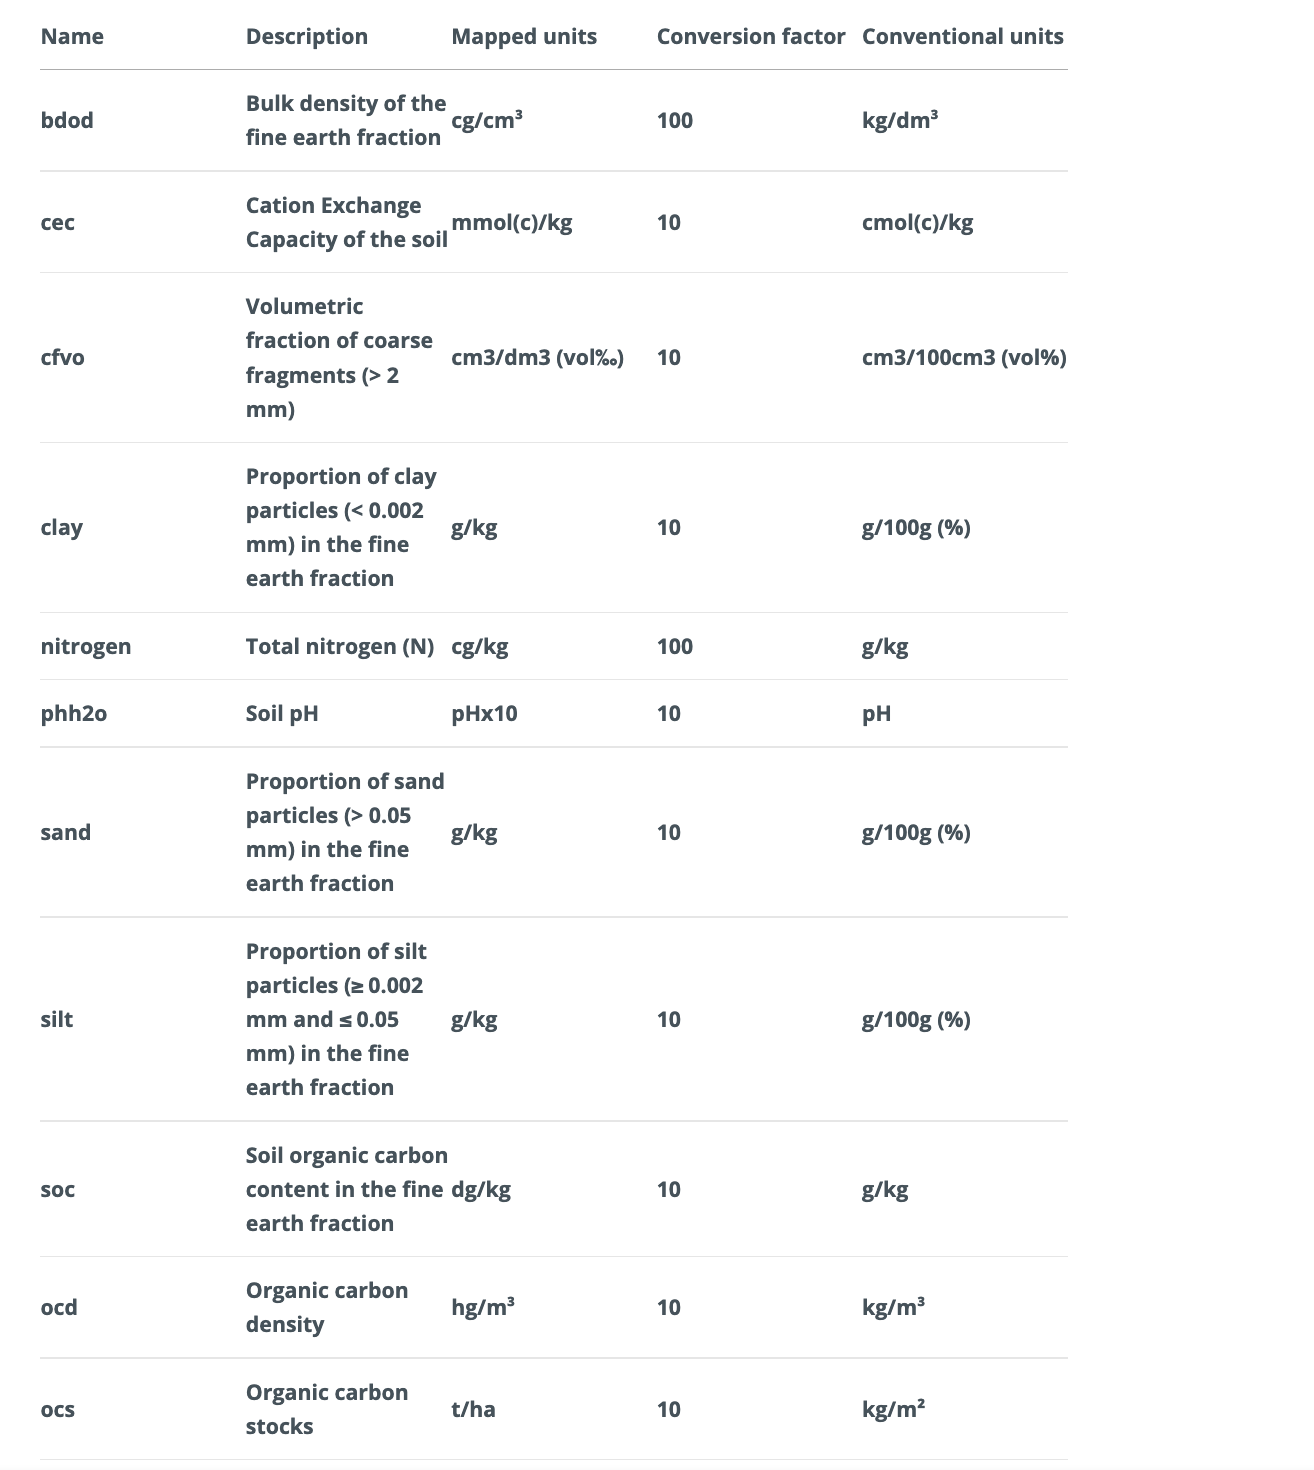
    
3. Missing data (amount and years/locations missing)
    - Time aspect is missing
    
4. Nulls or Nans
    - N/A
    
5. Primary key
    - Lat/Long
    
6. Columns to join on
    - Lat/Long
    
7. Any additional fields
    - Additional depth information for each soil type
    
7.Ease of access
Is there a free to use license?
How is data accessed? (API, download)
Is the documentation straightforward?
Any limits on how much data we can download?


In [1]:
from owslib.wcs import WebCoverageService

In [2]:
wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/phh2o.map',
                         version='2.0.1')

In [3]:
cov_id = 'phh2o_0-5cm_mean'
ph_0_5 = wcs.contents[cov_id]
ph_0_5.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [51]:
ph_0_5.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [89]:
subsets = [('X', 7444913.55, 7464659.72), ('Y', 4689195.44, 4740920.92)]

In [90]:
crs = "http://www.opengis.net/def/crs/EPSG/0/29101"

In [95]:
response = wcs.getCoverage(
    identifier=[cov_id], 
    crs=crs,
    subsets=subsets, 
    resx=250, resy=250, 
    format=ph_0_5.supportedFormats[0])

In [92]:
response.read()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00O\x00\x00\x00\xcf\x08\x02\x00\x00\x00;\xe6\x1b\t\x00\x00\x0f.IDATx\x9c\xd5\x9d\xcd\x8e\xe5\xb8\r\x85\xfdF\x83\x0c`\x03\x93F\x10 \xdbl\xf3r\x19\xa0\x96\xb5\xcc*\x08\x82<\x9ds\xbbTW\x97"\x0f\xc9CY\xae\xee)\x08\r\xb7\xaf~\xf8\x91\x87\x92\xfcs\xab\xb6\xe3_\x7f\xb2\xe5\xb7\x7f\xff\xd2J;\x86u\xf6\xf7\xe3{y\xfb\xd6\xfe}\x9dy?`}\xaf\x7f\xdc\xed\xaa\xf2\xf6\xed1\xca\xdf\xfe\xf3k+[j\x905K\xf2|\xa7U\x85\xa0\r\x80\x17r\xb6\x83\x07\xe4\xdf\xff\xfb\xfd\xdf\xc7\xb1K\xdb\r\x82\xd6\x0cf\x19\xe0\xde\x9cd\x8e\x81/\xb9\xe0\x83\xf9\x81\xda:\x89hs\xaf?e\xfc(\xbf\xfe\xfe\x17E[\n\xefW\xa8\x9a\xa7\xa5\xbc\x08\xcb\x18%\xc8<9"Wd\x9f\xd7b;fH\xff\xef#\xce-\xd42\xe0\x01\xf0\x02_s\xc0/Z&\xcd\xf8\x01\x1a\xf0@K\x03[[\x17\xc7\xb6M\xd3+\x81CU\x93C\\\x0coG\xeb\\\xb5\xd8\xce\x90\x0b\xda\xcfP\x0b\xf1\x1f\xe3z\xb6phY\xb9/\xb9\x9aVN\x92)\xbf7L)\xced\xc0\xab^VM\x1e,\x8fUw\xa0m\xa5Iz\x9aV\x8e4\xc0\xcb\xa8\x8e\xaa\xf6P\x95\xef.\xd2\xea\xbd\x94$\xbcB\xab\x18\x18\x9bl\x135\x8a7\xb4

In [96]:
with open('test.tif', 'wb') as file:
    file.write(response.read())

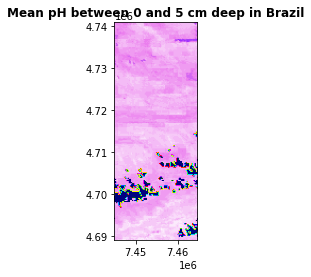

<AxesSubplot:title={'center':'Mean pH between 0 and 5 cm deep in Brazil'}>

In [97]:
import rasterio
from rasterio import plot

ph = rasterio.open("test.tif", driver="GTiff")
%matplotlib inline
plot.show(ph, title='Mean pH between 0 and 5 cm deep in Brazil', cmap='gist_ncar')

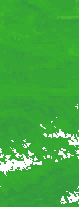

In [94]:
from IPython.display import Image
Image(filename='test.png')